In [1]:
import numpy as np
import numpy.linalg as la

In [2]:
from matplotlib import pyplot as plt
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

In [3]:
from numpy.random import normal, multivariate_normal as mvnorm

In [4]:
def get_n_simplex(n, s=1):
    coords = np.zeros(shape=(n+1, n))
    for i in range(n):
        coords[i][i] = 1
    coords[n] = (1-np.sqrt(n+1))/n * np.ones(n)
    return (coords-coords.mean(0))/np.sqrt(2) * s

In [5]:
X1 = mvnorm((0,0), [[1,0.5],[0.5,1]], 100)
X2 = X1[:50, :]
xs = normal(size=(100, 1))
X3 = np.hstack([xs, xs*0.3])
X3 = np.vstack([X3, get_n_simplex(2)])
X4 = X3[-50:, :]

In [6]:
get_n_simplex(2)

array([[ 0.55767754, -0.14942925],
       [-0.14942925,  0.55767754],
       [-0.40824829, -0.40824829]])

In [7]:
def plot_scatter(X, title="", ax=None):    
    if not ax:
        _, ax = plt.subplots(1, 1)            
    
    X = X - X.mean(0)
    
    ax.scatter(X[:, 0], X[:, 1])
    ax.set_title(title)
    ax.set_aspect(1)
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4])
    
    U, sigma, Vt = la.svd(X)
    Q, R = la.qr(X)
    
    Z = la.norm(X, axis=0).prod()      
    sv_prod = sigma.prod()/Z
    gram_det = np.sqrt(np.abs(la.det(X.T.dot(X))))/Z
    detR =  np.abs(la.det(R))/Z
    
    vr = 0.3        
    ax.arrow(0, 0, vr*sigma[0]*Vt[0, 0], vr*sigma[0]*Vt[0, 1], color="red")
    ax.arrow(0, 0, vr*sigma[1]*Vt[1, 0], vr*sigma[1]*Vt[1, 1], color="orange")
    text_args = dict(verticalalignment="top", fontsize=12)
    ax.text(-3.8, 3.8, "product of singular values: %.4f" % sv_prod, **text_args)
    ax.text(-3.8, 3.3, "Gram det, sq(det(XtX)): %.4f" % gram_det, **text_args)
    ax.text(-3.8, 2.8, "det(R) of QR: %.4f" % detR, **text_args)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


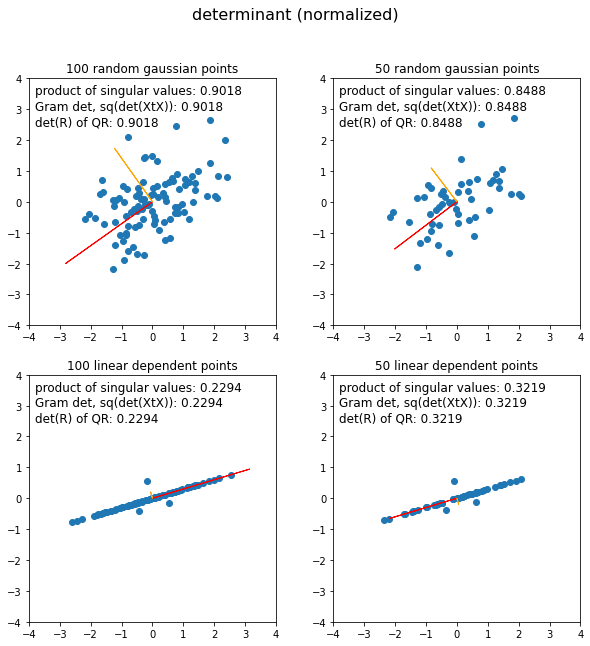

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle("determinant (normalized)", fontsize=16)
plot_scatter(X1, ax=axes[0][0], title="100 random gaussian points")
plot_scatter(X2, ax=axes[0][1], title="50 random gaussian points")
plot_scatter(X3, ax=axes[1][0], title="100 linear dependent points")
plot_scatter(X4, ax=axes[1][1], title="50 linear dependent points")

The determinant of a square $2\times2$ matrix can be interpreted as the area of parallelogram defined by the column vectors. If the matrix, $X$, is not a square matrix, the determinant is not defined. However, there are several alternatives available, all of which give the same results: 

$$
\textrm{Gramian determinant} \\ det(X) = \sqrt{det(X^\top X)} \\[1cm]
\textrm{QR decomposition} \\  det(X) = \sqrt{det(X^\top X)} = \sqrt{det(R^\top Q^\top Q R)} = \sqrt{det(R)^2} = det(R) \\[1cm]
\textrm{Singular value decomposition} \\ 
det(X) = \sqrt{det(X^\top X)} = \sqrt{det(VSU^\top USV^\top)}\\
 = \sqrt{det(VSSV^\top)} = \sqrt{det(V) det(S)^2 det(V^\top)} = \sqrt{det(S)^2} = 
 det(
 \begin{bmatrix}
     \sigma_i & \cdots \\ \vdots & \sigma_k 
 \end{bmatrix}) 
 = \prod_{i=1..k} \sigma_i
$$

In [9]:
X1_norm = la.norm(X1, axis=0)
nX1 = X1/la.norm(X1, axis=0)[np.newaxis, :]

In [10]:
np.sqrt(la.det(X1.T.dot(X1))), np.sqrt(la.det(X1.T.dot(X1)))/X1_norm.prod(), np.sqrt(la.det(nX1.T.dot(nX1)))

(82.64004102350728, 0.90665803679428, 0.90665803679428)